https://www.kaggle.com/archit9406/customer-transaction-dataset

1.Understand what is cohort and cohort analysis

2.Handling missing values

3.Month extraction from date

4.Assign cohort to each transaction

5.Assigning cohort Index to each transaction

6.Calculate the number of unique customers in each group

7.Create cohort table for retention rate

8.Visualize the cohort table using the heatmap

9.Interpret the retention rate

### Understand what is cohort and cohort analysis

Cohort analysis is a descriptive analytics technique in cohort analysis. 


Objectives:

Finding the percentage of active customers compared to the total number of customers after each month: Customer Segmentations
    
Interpret the retention rate

### Load the data and Handling missing values

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline
sns.set_style()

In [2]:
raw_data = pd.read_csv('customer_transaction.csv')
raw_data.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,25/02/2017,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,41245.0
1,2,3,3120,21/05/2017,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,41701.0
2,3,37,402,16/10/2017,False,Approved,OHM Cycles,Standard,low,medium,1793.43,$248.82,36361.0
3,4,88,3135,31/08/2017,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,$381.10,36145.0
4,5,78,787,01/10/2017,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,$709.48,42226.0


In [3]:
raw_data.shape

(20000, 13)

In [4]:
#check for missing values
raw_data.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [5]:
#let's drop the missing values.
raw_data = raw_data.dropna()

In [6]:
raw_data.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

### Month extraction from date

In [7]:
#check the type of the data column
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           19445 non-null  int64  
 1   product_id               19445 non-null  int64  
 2   customer_id              19445 non-null  int64  
 3   transaction_date         19445 non-null  object 
 4   online_order             19445 non-null  object 
 5   order_status             19445 non-null  object 
 6   brand                    19445 non-null  object 
 7   product_line             19445 non-null  object 
 8   product_class            19445 non-null  object 
 9   product_size             19445 non-null  object 
 10  list_price               19445 non-null  float64
 11  standard_cost            19445 non-null  object 
 12  product_first_sold_date  19445 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 2.1+ MB


In [8]:
#Converte transaction_date to datetime 
raw_data.transaction_date =pd.to_datetime(raw_data.transaction_date, format='%d/%m/%Y')

In [9]:
raw_data.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,41245.0
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,41701.0
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,$248.82,36361.0
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,$381.10,36145.0
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,$709.48,42226.0


In [10]:
#let's remove the $ sign from product_first_sold_date
#raw_data.production_first_sold_date = raw_data['standard_cost'].apply(lambda x:x[1:])

In [11]:
#raw_data.production_first_sold_date = pd.to_numeric(raw_data.production_first_sold_date)

In [12]:
#Let's create a function that will extract the month of each tracsction

def extract_month(x):
    return dt.datetime(x.year, x.month, 1)

In [13]:

raw_data['TransactionMonth'] = raw_data.transaction_date.apply(extract_month)
raw_data.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,TransactionMonth
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,41245.0,2017-02-01
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,41701.0,2017-05-01
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,$248.82,36361.0,2017-10-01
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,$381.10,36145.0,2017-08-01
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,$709.48,42226.0,2017-10-01


### Assign cohort to each transaction

In [14]:
#group the data base on the customer id and TransactionMonth
grouping = raw_data.groupby(['customer_id'])['TransactionMonth']

In [15]:
raw_data['CohortMonth'] = grouping.transform('min')
raw_data.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,TransactionMonth,CohortMonth
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,41245.0,2017-02-01,2017-02-01
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,41701.0,2017-05-01,2017-01-01
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,$248.82,36361.0,2017-10-01,2017-01-01
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,$381.10,36145.0,2017-08-01,2017-02-01
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,$709.48,42226.0,2017-10-01,2017-01-01


### Assigning cohort Index to each transaction

In [16]:
#create a function that will return the cohort index
def cohort_index(x):
    d1 = x['TransactionMonth'] 
    d2 = x.CohortMonth
    
    index = (d1.year - d2.year) * 12 + (d1.month - d2.month) +1
    
   # x['TransactionMonth'].year - x['CohortMonth'].year)*12 + x['TransactionMonth'].month - x['CohortMonth'] .month +1
    return index

In [17]:
raw_data['CohortIndex'] = raw_data.apply(lambda x: cohort_index(x), axis=1)
raw_data.head()


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,TransactionMonth,CohortMonth,CohortIndex
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,41245.0,2017-02-01,2017-02-01,1
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,41701.0,2017-05-01,2017-01-01,5
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,$248.82,36361.0,2017-10-01,2017-01-01,10
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,$381.10,36145.0,2017-08-01,2017-02-01,7
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,$709.48,42226.0,2017-10-01,2017-01-01,10


In [18]:
raw_data.CohortIndex.unique()

array([ 1,  5, 10,  7,  2,  3,  4,  8,  9,  6, 12, 11])

### Calculate the number of unique customers in each group

In [19]:
raw_data.groupby(['CohortIndex']).agg({'customer_id':'count'}).sort_values('customer_id', ascending=False)

,customer_id
CohortIndex,
1,4368
4,1653
5,1575
3,1574
2,1572
7,1555
8,1500
6,1491
9,1377


### Create cohort table for retention rate

In [20]:
#count the number of user in each cohort
cohort_data = raw_data.groupby(['CohortIndex', 'CohortMonth'])['customer_id'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()


# let's create a pivot table by passing the CohortIndex as index, the CohortMonth as column, and customer_id as values

cohort_table= cohort_data.pivot(index ='CohortMonth',
                             columns='CohortIndex',
                            values='customer_id')

In [21]:
cohort_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,1321.0,464.0,477.0,483.0,480.0,462.0,493.0,502.0,479.0,501.0,471.0,494.0
2017-02-01,794.0,310.0,291.0,306.0,277.0,291.0,303.0,275.0,322.0,297.0,282.0,NaN
2017-03-01,490.0,169.0,171.0,165.0,179.0,184.0,168.0,206.0,184.0,186.0,NaN,NaN
2017-04-01,341.0,110.0,119.0,155.0,142.0,123.0,141.0,124.0,132.0,NaN,NaN,NaN
2017-05-01,214.0,87.0,77.0,86.0,70.0,73.0,72.0,81.0,NaN,NaN,NaN,NaN
2017-06-01,128.0,49.0,46.0,51.0,49.0,47.0,52.0,NaN,NaN,NaN,NaN,NaN
2017-07-01,83.0,29.0,31.0,33.0,39.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,54.0,18.0,23.0,18.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,25.0,7.0,8.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
#now let's get the retention rate
cohort_size = cohort_table.iloc[:,0]
cohort_size

CohortMonth
2017-01-01    1321.0
2017-02-01     794.0
2017-03-01     490.0
2017-04-01     341.0
2017-05-01     214.0
2017-06-01     128.0
2017-07-01      83.0
2017-08-01      54.0
2017-09-01      25.0
2017-10-01      23.0
2017-11-01      15.0
2017-12-01       4.0
Name: 1, dtype: float64

In [23]:
retention_table = cohort_table.divide(cohort_size, axis=0)


In [24]:
retention_table = retention_table.round(3) * 100
retention_table = retention_table.round(2)

In [25]:
retention_table = pd.DataFrame(retention_table)
retention_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,100.0,35.1,36.1,36.6,36.3,35.0,37.3,38.0,36.3,37.9,35.7,37.4
2017-02-01,100.0,39.0,36.6,38.5,34.9,36.6,38.2,34.6,40.6,37.4,35.5,NaN
2017-03-01,100.0,34.5,34.9,33.7,36.5,37.6,34.3,42.0,37.6,38.0,NaN,NaN
2017-04-01,100.0,32.3,34.9,45.5,41.6,36.1,41.3,36.4,38.7,NaN,NaN,NaN
2017-05-01,100.0,40.7,36.0,40.2,32.7,34.1,33.6,37.9,NaN,NaN,NaN,NaN
2017-06-01,100.0,38.3,35.9,39.8,38.3,36.7,40.6,NaN,NaN,NaN,NaN,NaN
2017-07-01,100.0,34.9,37.3,39.8,47.0,30.1,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,100.0,33.3,42.6,33.3,27.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,100.0,28.0,32.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Visualize the cohort table using the heatmap

In [26]:
#let’s set the index of our Retention rate dataframe to a more readable string format.
retention_table.index = retention_table.index.strftime('%Y-%m')

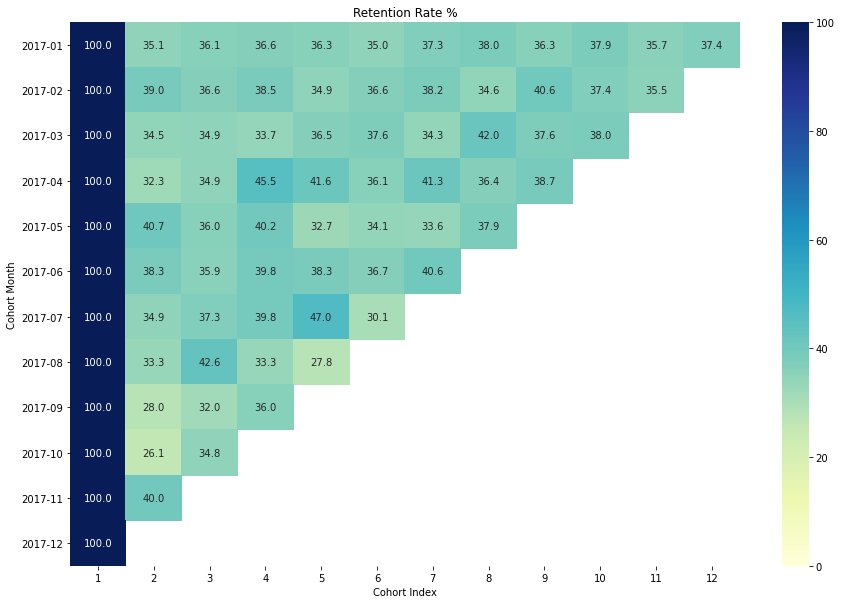

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(data=retention_table, annot = True,vmin = 0.0, vmax =100,cmap="YlGnBu", fmt='')

plt.title('Retention Rate %')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='360')
plt.xticks( rotation='360')
plt.show()

### Interpret the retention rate

Here, We have 12 cohorts for each month and 12 cohort indexes. The darker the blue shades higher the values. 

Thus, if we see in 2017-07 cohort Month in 5th Cohort Index, we see the dark blue shade with  47% which means that 47% of cohorts that signed in July 2017 were active 5 months later.

At the same time we can see only 26.1% of cohort that signed on october 2017 were active one month later.